In [1]:
#Import Lib.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
df=pd.read_csv(r'C:\Users\DELL\Downloads\IMDB-Dataset 1\Train_data.csv')
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
24994,I have seen this movie at the cinema many year...,negative
24995,This movie was a real torture fest to sit thro...,negative
24996,John Wayne & Albert Dekker compete for oil rig...,negative
24997,Tarantino once remarked on a melodrama from th...,positive


In [3]:
#Count of labels
df['sentiment'].value_counts()

negative    12525
positive    12474
Name: sentiment, dtype: int64

In [4]:
#To find the Ratio of Positive and negative value
print('Positive value  =>',round(len(df[df['sentiment']=='positive'])/len(df.sentiment),2)*100,'%')
print('negative value   =>',round(len(df[df['sentiment']=='negative'])/len(df.sentiment),2)*100,'%')

Positive value  => 50.0 %
negative value   => 50.0 %


In [5]:
#Add new column for length of message
df['length']=df.review.str.len()
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


In [6]:
#Encoding the sentiment column as it has only 2 variables
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
df

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317
...,...,...,...
24994,I have seen this movie at the cinema many year...,0,756
24995,This movie was a real torture fest to sit thro...,0,3518
24996,John Wayne & Albert Dekker compete for oil rig...,0,1169
24997,Tarantino once remarked on a melodrama from th...,1,3304


In [7]:
#Convert all review to lower case
df['review']=df['review'].str.lower()

In [8]:
#Replace email address with 'emailaddress'
df['review']=df['review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

#Replace URLs with 'webaddress'
df['review']=df['review'].str.replace(r'http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\s*)?$','webaddress')

#Replace money symbols with 'moneysymb'
df['review']=df['review'].str.replace(r'€|\$','dollers')
                                    
#Replace 10 digit phone numbers (format include Paranthesis,spaces,no spaces,dashes) with 'phonenumber'
df['review']=df['review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')


#Replace number with 'numbr'
df['review']=df['review'].str.replace(r'\d+(\.\d+)?','numbr')

In [9]:
#Remove Punctuation
df['review']=df['review'].str.replace(r'[^\w\d\s]',' ')

#Remove whitespace between terms with a single
df['review']=df['review'].str.replace(r'\s+',' ')

#Remove Leading and trailing whitespace
df['review']=df['review'].str.replace(r'^\s+|\s+?$','')

In [10]:
df.head()

,review,sentiment,length
0,one of the other reviewers has mentioned that ...,1,1761
1,a wonderful little production br br the filmin...,1,998
2,i thought this was a wonderful way to spend ti...,1,926
3,basically there s a family where a little boy ...,0,748
4,petter mattei s love in the time of money is a...,1,1317


In [11]:
#Remove stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english')+['u','vs','..uh','uh','doin','<br /><br />','br'])
df['review']=df['review'].apply(lambda x:' '.join(term for term in x.split() if term not in stop_words))

In [12]:
#New column(clean_length) after filtering the data
df['cleaned_length']=df.review.str.len()
df.head()

,review,sentiment,length,cleaned_length
0,one reviewers mentioned watching numbr oz epis...,1,1761,1109
1,wonderful little production filming technique ...,1,998,656
2,thought wonderful way spend time hot summer we...,1,926,578
3,basically family little boy jake thinks zombie...,0,748,445
4,petter mattei love time money visually stunnin...,1,1317,852


In [13]:
#Total length removal
print('original Length',df.length.sum())

print('clean length',df.cleaned_length.sum())

original Length 32776690
clean length 20613824


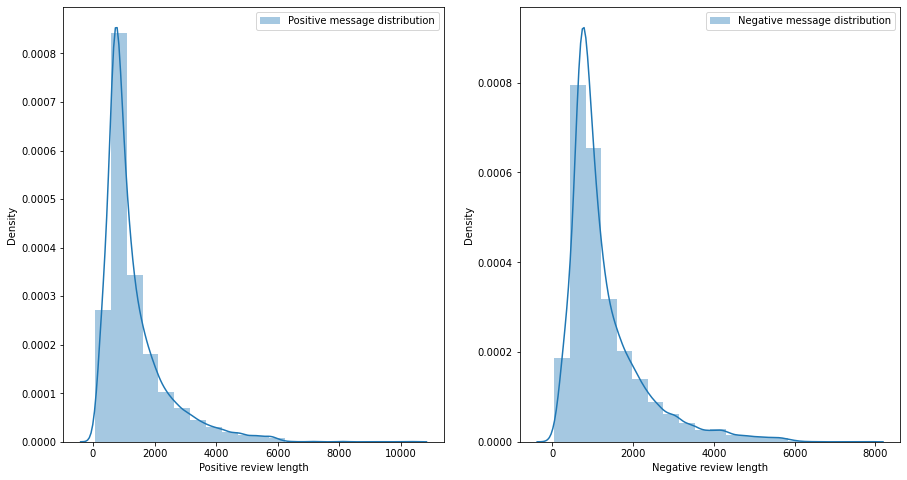

In [14]:
#Message distribution BEFORE CLEANING
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['sentiment']==1]['length'],bins=20,ax=ax[0],label='Positive message distribution')
ax[0].set_xlabel('Positive review length')
ax[0].legend()

sns.distplot(df[df['sentiment']==0]['length'],bins=20,ax=ax[1],label='Negative message distribution')
ax[1].set_xlabel('Negative review length')
ax[1].legend()

plt.show()

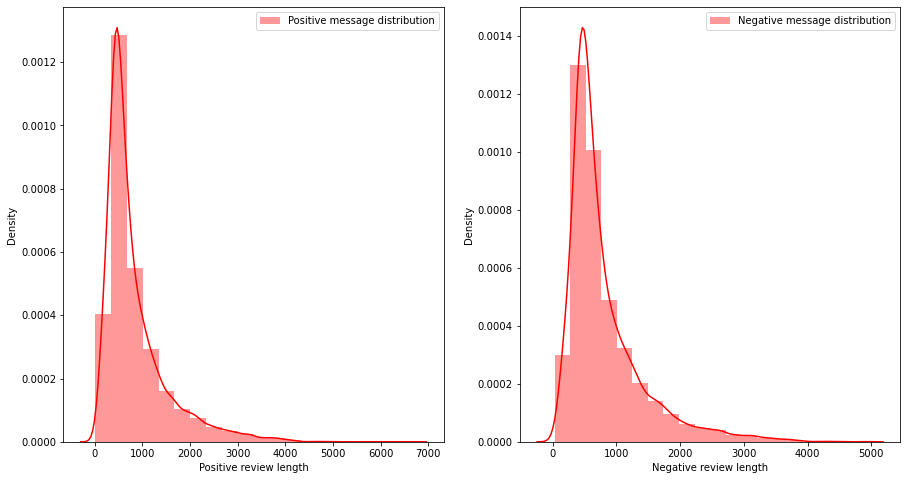

In [15]:
#Message distribution AFTER CLEANING
f,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(df[df['sentiment']==1]['cleaned_length'],bins=20,ax=ax[0],label='Positive message distribution',color='r')
ax[0].set_xlabel('Positive review length')
ax[0].legend()

sns.distplot(df[df['sentiment']==0]['cleaned_length'],bins=20,ax=ax[1],label='Negative message distribution',color='r')
ax[1].set_xlabel('Negative review length')
ax[1].legend()

plt.show()
f.savefig('sms distribution')

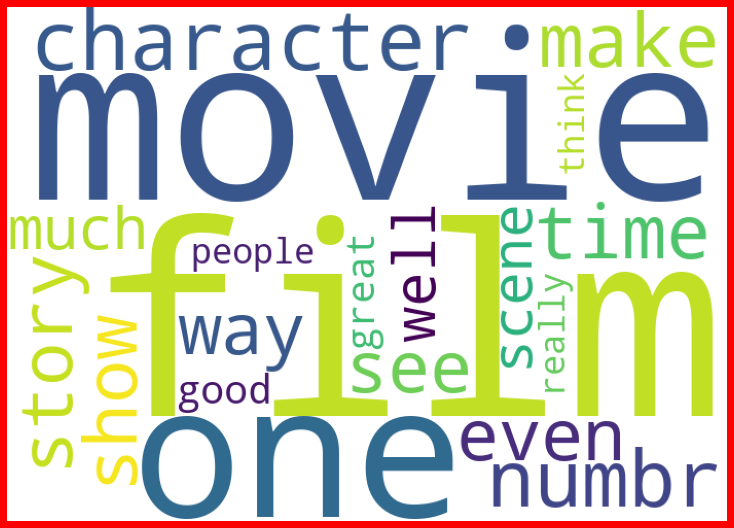

In [16]:
#Getting sense of Loud words in Positive sentiment
from wordcloud import WordCloud
positive_sentiment=df['review'][df['sentiment']==1]

sentiment_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(positive_sentiment))

plt.figure(figsize=(10,8),facecolor='r')

plt.imshow(sentiment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

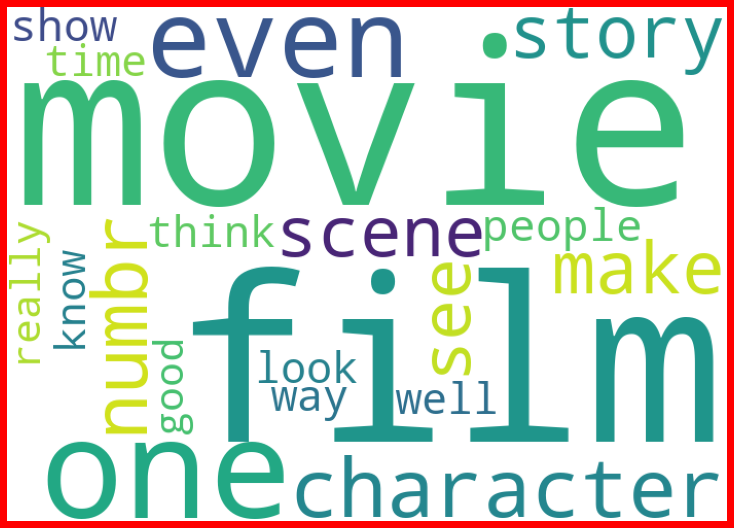

In [17]:
#Getting sense of Loud words in negative sentiment
from wordcloud import WordCloud
positive_sentiment=df['review'][df['sentiment']==0]

sentiment_cloud=WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(positive_sentiment))

plt.figure(figsize=(10,8),facecolor='r')

plt.imshow(sentiment_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

.No need to do this , but i just want to check the diffrence of words after cleaning 

In [18]:
#Convert text into vectors using TI-FDF
#Instantiate MultinomialNB Classifier , SupportVectorMachineClassifier(SVC),Decision_Tree_Classifier
#split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

tf_vec=TfidfVectorizer()
navie=MultinomialNB()
svc=SVC()
clf=DecisionTreeClassifier()

features=tf_vec.fit_transform(df['review'])

x=features
y=df['sentiment']

In [19]:
#Train and predict for MultinomialNB
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
navie.fit(x_train,y_train)
y_pred=navie.predict(x_test)
print('Final score  =>',accuracy_score(y_test,y_pred))

Final score  => 0.86672


Here we got approx 86.6% accuracy for MultinomialNB

In [20]:
#Classification report and confusion matrix
print(classification_report(y_test,y_pred))

#Confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3143
           1       0.88      0.84      0.86      3107

    accuracy                           0.87      6250
   macro avg       0.87      0.87      0.87      6250
weighted avg       0.87      0.87      0.87      6250



array([[2794,  349],
       [ 484, 2623]], dtype=int64)

In [21]:
#Checking the accuracy by DecisionTreeClassifier
clf.fit(x_train,y_train)
clf.score(x_train,y_train)

1.0

In [22]:
y_pred=clf.predict(x_test)
clf.score(x_test,y_test)

0.70816

Here accuracy is only 70%

In [23]:
#Checking confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[2268,  875],
       [ 949, 2158]], dtype=int64)

In [24]:
#Building model (SVC)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      3143
           1       0.88      0.91      0.90      3107

    accuracy                           0.89      6250
   macro avg       0.90      0.89      0.89      6250
weighted avg       0.90      0.89      0.89      6250



Accuracy of SVC Model is 89% , which is higher then other model.

In [26]:
 #Checking confusion_matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[2753,  390],
       [ 269, 2838]], dtype=int64)

In [34]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(svc)